<a href="https://colab.research.google.com/github/Marvel280904/W4---DataMining---Marvel/blob/main/Exercise_Week_4_Classification_Model_%5BQuestion%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Marvel280904/W4---DataMining---Marvel/refs/heads/main/penguins_size.csv')
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
165,Chinstrap,Dream,52.0,18.1,201.0,4050.0,MALE
314,Gentoo,Biscoe,44.5,14.7,214.0,4850.0,FEMALE
166,Chinstrap,Dream,45.9,17.1,190.0,3575.0,FEMALE
195,Chinstrap,Dream,45.5,17.0,196.0,3500.0,FEMALE
212,Chinstrap,Dream,51.9,19.5,206.0,3950.0,MALE
79,Adelie,Torgersen,42.1,19.1,195.0,4000.0,MALE
295,Gentoo,Biscoe,48.6,16.0,230.0,5800.0,MALE
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
124,Adelie,Torgersen,35.2,15.9,186.0,3050.0,FEMALE
250,Gentoo,Biscoe,47.3,15.3,222.0,5250.0,MALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [5]:
colom = {'species', 'island', 'sex'}
for col in colom:
  print(df[col].value_counts())

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64


5. Drop the null column(s)

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Change the value "." in sex column, try to predict it based on other features (try to groupby 'sex' with Gentoo species in describe)

In [7]:
df.loc[df['sex'] == '.', 'sex'] = 'MALE'

In [8]:
df.loc[336]

,336
species,Gentoo
island,Biscoe
culmen_length_mm,44.5
culmen_depth_mm,15.7
flipper_length_mm,217.0
body_mass_g,4875.0
sex,MALE


In [9]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose()

sex                           FEMALE         MALE
culmen_length_mm  count    58.000000    62.000000
                  mean     45.563793    49.393548
                  std       2.051247     2.771155
                  min      40.900000    44.400000
                  25%      43.850000    47.875000
                  50%      45.500000    49.500000
                  75%      46.875000    50.500000
                  max      50.500000    59.600000
culmen_depth_mm   count    58.000000    62.000000
                  mean     14.237931    15.717742
                  std       0.540249     0.734964
                  min      13.100000    14.100000
                  25%      13.800000    15.200000
                  50%      14.250000    15.700000
                  75%      14.600000    16.100000
                  max      15.500000    17.300000
flipper_length_mm count    58.000000    62.000000
                  mean    212.706897   221.467742
                  std       3.897856     5.656036
                  min     203.000000   208.000000
                  25%     210.000000   217.250000
                  50%     212.000000   221.000000
                  75%     215.000000   225.000000
                  max     222.000000   231.000000
body_mass_g       count    58.000000    62.000000
                  mean   4679.741379  5475.000000
                  std     281.578294   320.092200
                  min    3950.000000  4750.000000
                  25%    4462.500000  5262.500000
                  50%    4700.000000  5500.000000
                  75%    4875.000000  5700.000000
                  max    5200.000000  6300.000000

7. Create your own insightful visualization and explain it in at least 2 sentences

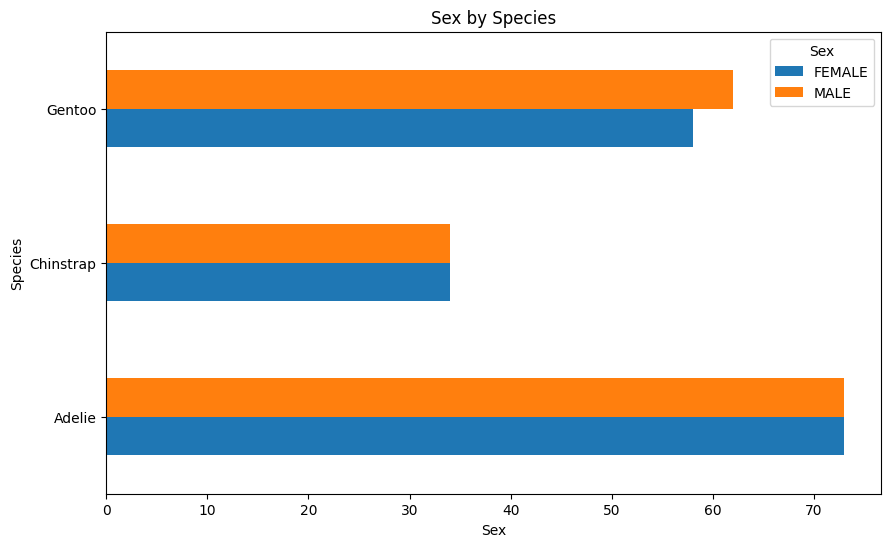

In [10]:
count_type_by_quality = df.groupby(['species','sex'])['sex'].count().unstack()
count_type_by_quality.plot (kind='barh',figsize=(10,6))
plt.title('Sex by Species')
plt.xlabel('Sex')
plt.ylabel('Species')
plt.legend(title='Sex')
plt.show()
# visualisasi ini untuk melihat rata-rata sex berdasarkan tiap species
# bisa kita lihat bahwa species Gentoo paling banyak MALE, Chinstrap dan Adelie sama rata

8. Check unique value of our target variable

In [11]:
for col in ['species']:
  print(df[col].unique())

['Adelie' 'Chinstrap' 'Gentoo']


9. encode categorical columns and display the results

In [12]:
island_map = {'Torgersen': 1, 'Dream': 2, 'Biscoe': 3}
sex_map = {'MALE': 1, 'FEMALE': 2}

df['island'] = df['island'].map(island_map)
df['sex'] = df['sex'].map(sex_map)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,1,39.1,18.7,181.0,3750.0,1
1,Adelie,1,39.5,17.4,186.0,3800.0,2
2,Adelie,1,40.3,18.0,195.0,3250.0,2
4,Adelie,1,36.7,19.3,193.0,3450.0,2
5,Adelie,1,39.3,20.6,190.0,3650.0,1


10. encode the target column and display the results

In [13]:
species_map = {'Adelie': 1, 'Chinstrap': 2, 'Gentoo': 3}
df['species'] = df['species'].map(species_map)
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,1,39.1,18.7,181.0,3750.0,1
1,1,1,39.5,17.4,186.0,3800.0,2
2,1,1,40.3,18.0,195.0,3250.0,2
4,1,1,36.7,19.3,193.0,3450.0,2
5,1,1,39.3,20.6,190.0,3650.0,1


11. create a heatmap to see the correlation and explain the conclusion

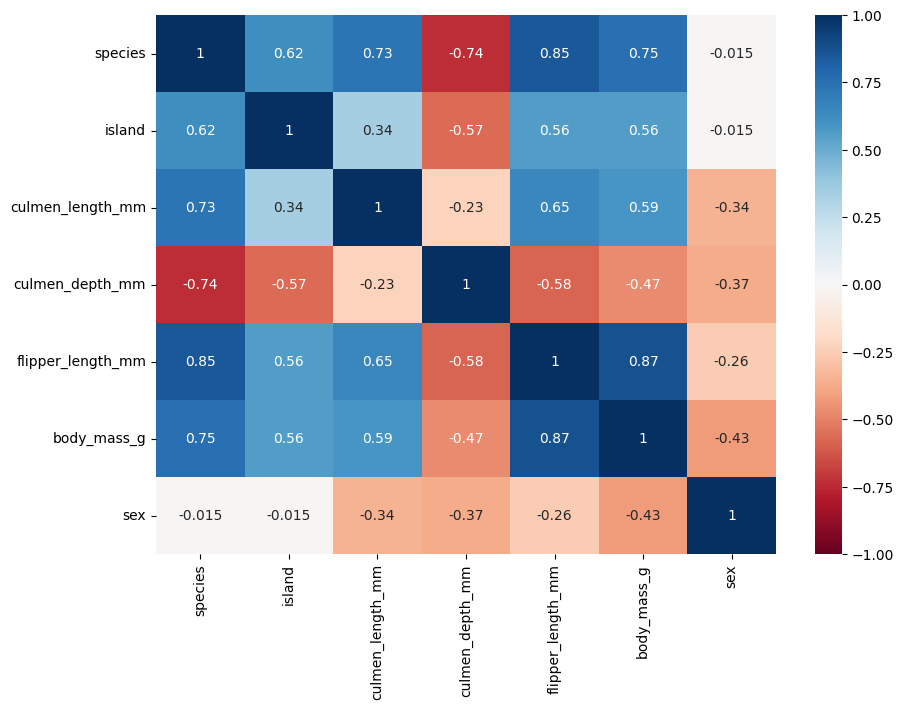

species: Berkorelasi positif kuat dengan flipper_length_mm (0.9) dan body_mass_g (0.8), serta negatif dengan culmen_depth_mm (-0.7).
island: Negatif dengan species (-0.6), positif dengan culmen_depth_mm (0.6).
culmen_length_mm: Positif dengan species (0.7) dan flipper_length_mm (0.7).
culmen_depth_mm: Negatif dengan species (-0.7) dan flipper_length_mm (-0.6).
flipper_length_mm: Positif dengan species (0.9) dan body_mass_g (0.9).
body_mass_g: Positif dengan flipper_length_mm (0.9) dan culmen_length_mm (0.6).
sex: Korelasi lemah dengan sebagian besar variabel, kecuali culmen_depth_mm (0.4) dan body_mass_g (0.4).


In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='RdBu',
vmin=-1, vmax=1, annot=True)
plt.show()
print("species: Berkorelasi positif kuat dengan flipper_length_mm (0.9) dan body_mass_g (0.8), serta negatif dengan culmen_depth_mm (-0.7).")
print("island: Negatif dengan species (-0.6), positif dengan culmen_depth_mm (0.6).")
print("culmen_length_mm: Positif dengan species (0.7) dan flipper_length_mm (0.7).")
print("culmen_depth_mm: Negatif dengan species (-0.7) dan flipper_length_mm (-0.6).")
print("flipper_length_mm: Positif dengan species (0.9) dan body_mass_g (0.9).")
print("body_mass_g: Positif dengan flipper_length_mm (0.9) dan culmen_length_mm (0.6).")
print("sex: Korelasi lemah dengan sebagian besar variabel, kecuali culmen_depth_mm (0.4) dan body_mass_g (0.4).")

## Machine Learning

1. Splitting X and y

In [16]:
X = df.drop(['species'], axis = 1)
y = df['species']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape, X_test.shape

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [19]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [20]:
y_pred_en = clf_en.predict(X_test)

In [21]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9701


In [22]:
print('Training set score: {0:0.4f}' .format(clf_en.score(X_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_en.score(X_test, y_test)))

Training set score: 0.9625
Test set score: 0.9701


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.524\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 42.35\nentropy = 0.938\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[2] <= 16.7\nentropy = 0.078\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.5, 0.375, 'x[4] <= 4075.0\nentropy = 0.736\nsamples = 59\nvalue = [9, 49, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.272\nsamples = 16\nvalue = [8, 7, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.417\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(

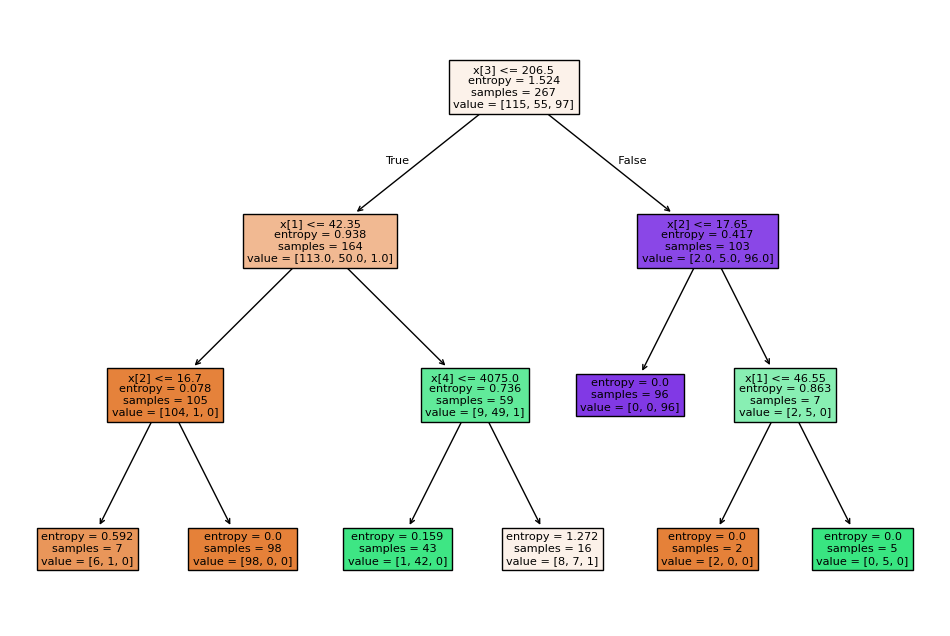

In [23]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf_en.fit(X_train, y_train), filled = True)

2. Criterion Gini index

In [24]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [25]:
y_pred_gini = clf_gini.predict(X_test)

In [26]:
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9851


In [27]:
print('Training set score: {0:0.4f}' .format(clf_gini.score(X_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_gini.score(X_test, y_test)))

Training set score: 0.9738
Test set score: 0.9851


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.64\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.117\nsamples = 49\nvalue = [2.0, 46.0, 1.0]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.129\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 

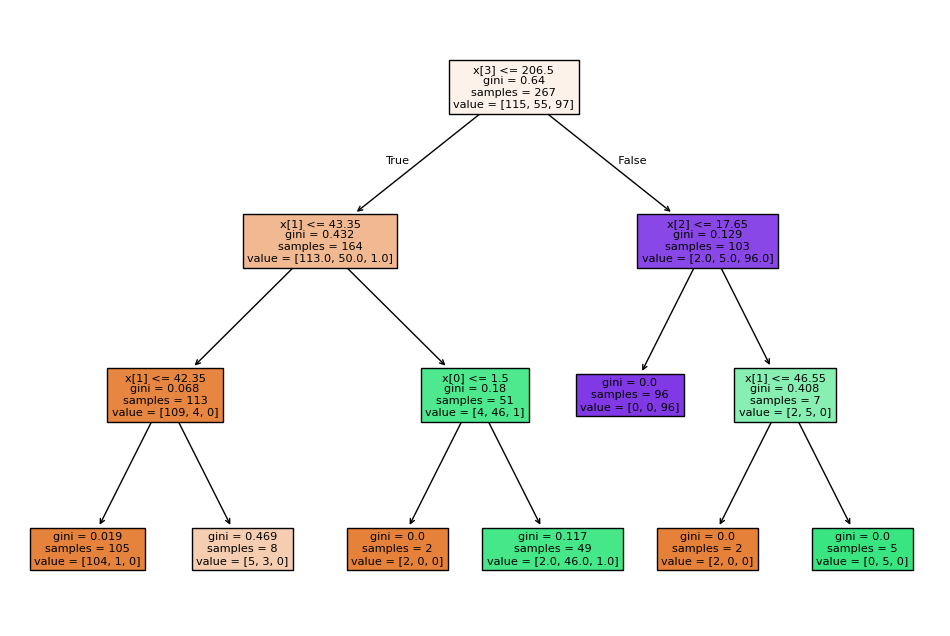

In [28]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled = True)

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [29]:
entropi = confusion_matrix(y_test, y_pred_en)
gini = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix entropy: \n', entropi)
print('Confusion matrix gini index: \n', gini)

Confusion matrix entropy: 
 [[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]
Confusion matrix gini index: 
 [[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [30]:
print('Classification Report Entropy')
print(classification_report(y_test, y_pred_en))
print('Classification Report Gini Index')
print(classification_report(y_test, y_pred_gini))

Classification Report Entropy
              precision    recall  f1-score   support

           1       0.97      0.97      0.97        31
           2       0.92      0.92      0.92        13
           3       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

Classification Report Gini Index
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



1. **Confusion Matrix:**

Pada kriteria entropy, terdapat 1 kesalahan pada kelas 1 yang diklasifikasikan sebagai kelas 2, dan 1 kesalahan pada kelas 2 yang diklasifikasikan sebagai kelas 1.
Pada kriteria Gini index, hanya ada 1 kesalahan pada kelas 2 yang diklasifikasikan sebagai kelas 1, tetapi tidak ada kesalahan klasifikasi di kelas 1 dan 3.

2. **Akurasi:**

Entropy memiliki akurasi 97%.
Gini index menunjukkan akurasi 99%, sedikit lebih baik daripada entropy.

3. **Precision, Recall, dan F1-Score:**

Entropy:
Precision, recall, dan f1-score untuk semua kelas cukup tinggi, dengan nilai rata-rata makro 0.96 dan weighted avg 0.97.

Gini index:
Precision, recall, dan f1-score juga tinggi, namun pada Gini index rata-rata makro dan weighted avg lebih tinggi, yaitu masing-masing 0.98 dan 0.99.

4. **Kesimpulan:**

Gini index memberikan performa sedikit lebih baik dibandingkan entropy, dengan akurasi lebih tinggi dan nilai f1-score yang lebih sempurna pada beberapa kelas.
Kedua model sangat baik dalam melakukan klasifikasi, namun model dengan Gini index menghasilkan hasil yang lebih akurat dan lebih sedikit kesalahan dalam prediksi.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [32]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [33]:
nb_y_pred = nb_classifier.predict(X_test)

In [36]:
Gauss = confusion_matrix(y_test, nb_y_pred)
print('Confusion matrix GaussianNB: \n', Gauss)

print('Accuracy Score with GaussianNB: {0:0.1f}'.format(accuracy_score(y_test, nb_y_pred)))
print('Training set score: {0:0.4f}' .format(nb_classifier.score(X_train, y_train)))
print('Test set score: {0:0.4f}' .format(nb_classifier.score(X_test, y_test)))

Confusion matrix GaussianNB: 
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Accuracy Score with GaussianNB: 1.0
Training set score: 0.9588
Test set score: 1.0000


In [37]:
print('Classification Report GaussianNB')
print(classification_report(y_test, nb_y_pred))

Classification Report GaussianNB
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



1. Confusion Matrix: Tidak ada kesalahan klasifikasi (semua nilai di luar diagonal utama adalah nol), yang berarti model mengklasifikasikan setiap sampel dengan benar.

2. Accuracy Score: 1.0 (100%) baik pada training set (95.88%) maupun test set (100%).

3. Classification Report: Precision, recall, dan f1-score semuanya sempurna (1.00) untuk ketiga kelas.

4. Kesimpulan: Model GaussianNB memiliki performa sempurna dalam pengujian ini, tanpa kesalahan klasifikasi.

Good Luck :)